# test

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None 

       population     profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000 



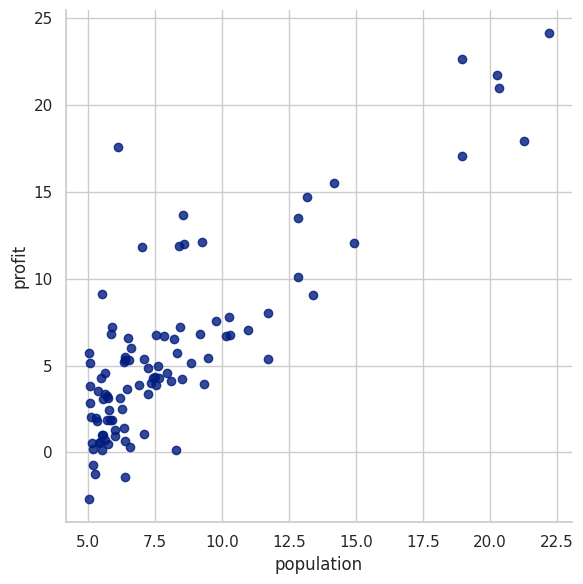

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>
[0. 0.]
[-3.89530051  1.19298539]


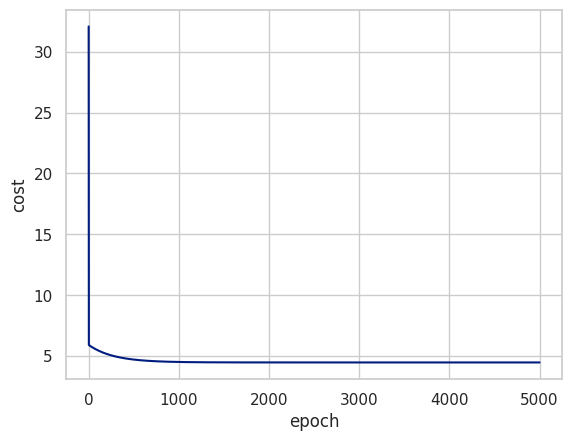

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt

df = pd.read_csv("ex1data1.txt", names=["population", "profit"])
print(df.head(),"\n")
print(df.info(),"\n")
describe_info = df.describe()
print(describe_info, "\n")

sns.lmplot(x="population", y="profit", data=df, height=6, fit_reg=False)
plt.show()

def get_X(df): #读取特征
    ones = pd.DataFrame({"ones" : np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_y(df): #读取标签
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean())/column.std())

data = df
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

theta = np.zeros(X.shape[1])
print(theta)

def lr_loss(theta, X, y):
# 代价函数
    m = X.shape[0] # m是样本数
    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / ( m * 2)
    
    return cost

lr_loss(theta, X, y)

def gradient(theta, X, y):
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)
    return inner / m

def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    cost_data = [lr_loss(theta, X, y)]
    _theta = theta.copy()

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_loss(_theta, X, y))
    return _theta, cost_data

epoch = 5000

final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

print(final_theta)
#print("\n", cost_data)

lr_loss(final_theta, X, y)

#ax = sns.lineplot(cost_data, time=np.range(epoch + 1))
#ax.set_xlabel("epoch")
#ax.set_ylabel("cost")
plt.plot(range(epoch+1), cost_data)
plt.xlabel("epoch")
plt.ylabel("cost")

plt.show()